# Stock Market Price prediction

In [1]:
#packages

import pandas as pd
import pytz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


## Downloading stock price data

In [2]:
import yfinance as yf

In [3]:
ticker= yf.Ticker("AAPL")

In [4]:
name= ticker.info["shortName"]
name

'Apple Inc.'

In [5]:
df= ticker.history(period= "10y")
#set period of data collected

In [6]:
#Show data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-04-08 00:00:00-04:00,28.105783,28.228614,27.909256,28.049952,149316800,0.0,0.0
2015-04-09 00:00:00-04:00,28.105787,28.268816,27.840028,28.264349,129936000,0.0,0.0
2015-04-10 00:00:00-04:00,28.128123,28.409517,27.974028,28.384951,160752000,0.0,0.0
2015-04-13 00:00:00-04:00,28.668570,28.713239,28.275515,28.329113,145460400,0.0,0.0
2015-04-14 00:00:00-04:00,28.362610,28.427376,28.119184,28.206282,102098400,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-01 00:00:00-04:00,219.809998,223.679993,218.899994,223.190002,36412700,0.0,0.0
2025-04-02 00:00:00-04:00,221.320007,225.190002,221.020004,223.889999,35905900,0.0,0.0
2025-04-03 00:00:00-04:00,205.539993,207.490005,201.250000,203.190002,103419000,0.0,0.0


## Cleaning and visualising price data.

Convert timezone to Harare, Zimbabwe time.

In [7]:
df=df.tz_convert("africa/harare")

In [8]:
del df["Dividends"]
del df["Stock Splits"]

In [9]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-08 06:00:00+02:00,28.105783,28.228614,27.909256,28.049952,149316800
2015-04-09 06:00:00+02:00,28.105787,28.268816,27.840028,28.264349,129936000
2015-04-10 06:00:00+02:00,28.128123,28.409517,27.974028,28.384951,160752000
2015-04-13 06:00:00+02:00,28.668570,28.713239,28.275515,28.329113,145460400
2015-04-14 06:00:00+02:00,28.362610,28.427376,28.119184,28.206282,102098400
...,...,...,...,...,...
2025-04-01 06:00:00+02:00,219.809998,223.679993,218.899994,223.190002,36412700
2025-04-02 06:00:00+02:00,221.320007,225.190002,221.020004,223.889999,35905900
2025-04-03 06:00:00+02:00,205.539993,207.490005,201.250000,203.190002,103419000


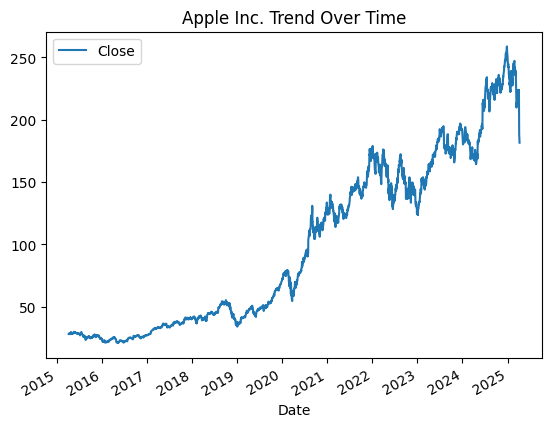

In [10]:
chart= df.plot.line(y="Close", title= (f"{name} Trend Over Time"), use_index=True);


## Setting up Prediction.

In [11]:
#creating a next day column and the closing price
df["Next Day"]= df["Close"].shift(-1)

In [12]:
df["Target"] = (df["Next Day"] >df["Close"]).astype(int)

In [13]:
df

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
2015-04-08 06:00:00+02:00,28.105783,28.228614,27.909256,28.049952,149316800,28.264349,1
2015-04-09 06:00:00+02:00,28.105787,28.268816,27.840028,28.264349,129936000,28.384951,1
2015-04-10 06:00:00+02:00,28.128123,28.409517,27.974028,28.384951,160752000,28.329113,0
2015-04-13 06:00:00+02:00,28.668570,28.713239,28.275515,28.329113,145460400,28.206282,0
2015-04-14 06:00:00+02:00,28.362610,28.427376,28.119184,28.206282,102098400,28.313484,1
...,...,...,...,...,...,...,...
2025-04-01 06:00:00+02:00,219.809998,223.679993,218.899994,223.190002,36412700,223.889999,1
2025-04-02 06:00:00+02:00,221.320007,225.190002,221.020004,223.889999,35905900,203.190002,0
2025-04-03 06:00:00+02:00,205.539993,207.490005,201.250000,203.190002,103419000,188.380005,0


Target is if the price will go up or down on the next day.

 1 means price will go up,  0 means price will go down.


## Building and training a model

In [14]:
#instatiate model
model= RandomForestClassifier(random_state=1)

#predictors/ feature matrix
X= ["Close", "Volume", "High", "Low", "Open"]
#target vector
y= "Target"

#train and test sets
train= df.iloc[:-100]
test= df.iloc[-100:]

#train the model
model.fit(train[X], train[y])

RandomForestClassifier(random_state=1)

## Evaluating the model

In [15]:
preds= model.predict(test[X]) #  numpy array output of predictions.

In [16]:
preds= pd.DataFrame(preds, index= test.index) # array to dataframe

In [17]:
preds.columns= ["Next Day Prediction"] #name the column

In [18]:
precision_score(test[y], preds)

0.5254237288135594

The precision score shows how accurately the model predicted that the price would go up.

## Results

In [20]:
pred_res= pd.concat([test[y], preds], axis=1)

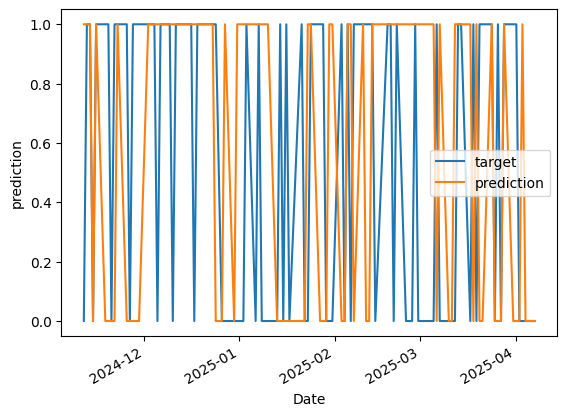

In [21]:
pred_res.plot(ylabel="prediction")
plt.legend(["target", "prediction"]);

Visual summary of model perfomance

In [22]:
preds.tail()

,Next Day Prediction
Date,
2025-04-01 06:00:00+02:00,0
2025-04-02 06:00:00+02:00,0
2025-04-03 06:00:00+02:00,1
2025-04-04 06:00:00+02:00,0
2025-04-07 06:00:00+02:00,0


The Prediction is of the next trading day.

1 means the price is predicted to go up.
0 means the price is predicted to go down.